In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Right CINGULATE of subjects in UKB, HCP, CCD and CCD Controls after implementing a betaVAE

In [91]:
#Load files

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-08-53/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-08-53/hcp/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-08-53/CCD/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-08-53/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-08-53/hcp/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-12/17-08-53/CCD/Reconstruction_error.csv")

In [92]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [93]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [94]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [95]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [96]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,ag080048,0.832823,1.023461,0.208231,-0.593750,0.597215,0.710835,0.912881,-0.109847,1.109254,...,1.411291,-0.814306,0.744315,-0.521995,-0.168067,0.300444,0.179948,0.469419,0.598382,0.221734
1,bt080019,-1.338569,-1.971996,-0.334461,-0.410039,0.700094,0.956200,1.887623,-1.507199,-0.678163,...,-0.132796,0.159735,1.460116,2.677655,0.558682,-1.752698,0.290839,-0.793612,0.039237,-0.331670
2,ca090293,0.274352,-0.087857,0.478880,-0.167606,-2.395260,1.111814,-0.143692,0.627423,-1.090011,...,-0.347016,-1.498250,-0.605280,1.715775,-1.270803,-1.015201,-0.661618,2.009596,-1.103820,0.747032
3,cd100556,-0.912509,0.271562,-1.312099,-1.023722,-0.716134,0.322463,-2.008564,0.948957,-2.546975,...,-1.267949,1.172487,0.147363,3.351567,1.412541,-0.462902,0.727274,1.064335,0.128989,-0.142205
4,cr070055,-1.540814,0.083241,-0.291517,0.612111,-0.165125,-0.136843,0.708084,0.072360,-1.020029,...,0.656214,-1.248610,0.782173,0.207576,-0.307037,-0.899043,-0.306481,-0.374618,0.332548,0.898599
5,fb070174,0.056273,-0.518452,1.405938,0.728743,0.229298,0.638514,-0.474203,0.919378,-1.584942,...,2.020618,-0.281487,-0.347217,0.635107,0.376094,-0.862370,-0.119713,0.102566,-0.208893,-0.354842
6,gd070065,-1.142754,-1.146653,-1.298441,-0.001280,0.519024,1.324029,0.340786,0.946777,-0.052678,...,1.577204,0.003180,1.015723,1.401721,-0.052140,-0.693989,-0.307105,-0.398157,0.957732,-1.002953
7,lc110410,-0.322420,1.238621,-1.308149,0.170358,-0.327554,1.344548,0.135245,0.802991,-0.371236,...,0.395034,-0.202040,0.393060,0.905711,1.607631,0.646894,-0.608103,0.336153,0.570225,-1.258698
8,md110095,-1.258121,-1.096755,-0.189584,-1.342875,0.210072,-0.612439,-0.234706,0.944913,-0.481686,...,0.327858,0.010606,-0.609575,-0.152792,0.365483,0.314902,-0.754898,0.877729,-1.643871,0.282099
9,mm080047,-1.857158,-1.463366,-1.306595,-0.507591,-1.006965,0.048234,-1.060924,0.833438,-1.536186,...,-0.346689,0.513430,-0.684322,1.713004,2.167812,-0.996381,-1.677564,1.382192,-0.635339,-2.406255


In [97]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,890.334412
1,bt080019,1637.273926
2,ca090293,1664.937988
3,cd100556,1248.534058
4,cr070055,2012.750610
5,fb070174,1536.336914
6,gd070065,2627.351562
7,lc110410,2176.069336
8,md110095,975.147095
9,mm080047,1554.254883


In [98]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [99]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [100]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

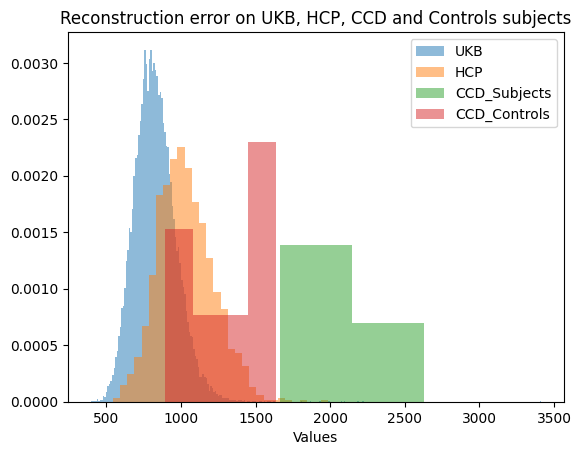

In [101]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [102]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_CCD_Controls.iloc[:,1:76]
X4= Embeddings_CCD_Subjects.iloc[:,1:76]


In [103]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)



/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


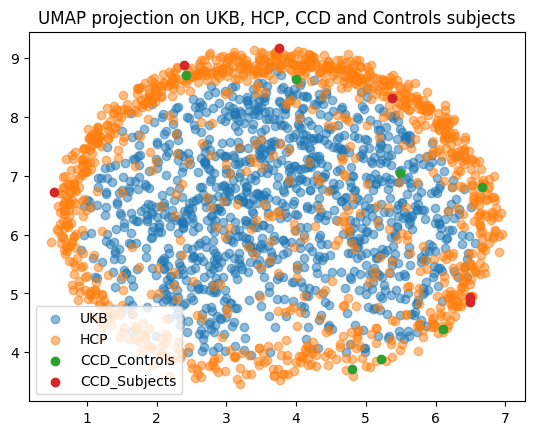

In [104]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="CCD_Subjects")
plt.title("UMAP projection on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [105]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [106]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,757.033203
1,UKB,910.784302
2,UKB,845.593872
3,UKB,944.164551
4,UKB,745.059265
...,...,...
42428,UKB,812.662109
42429,UKB,675.614807
42430,UKB,667.331909
42431,UKB,795.125732


In [107]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:9.771e-03 U_stat=1.754e+03
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:1.166e-03 U_stat=0.000e+00
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:1.405e-14 U_stat=5.000e+00


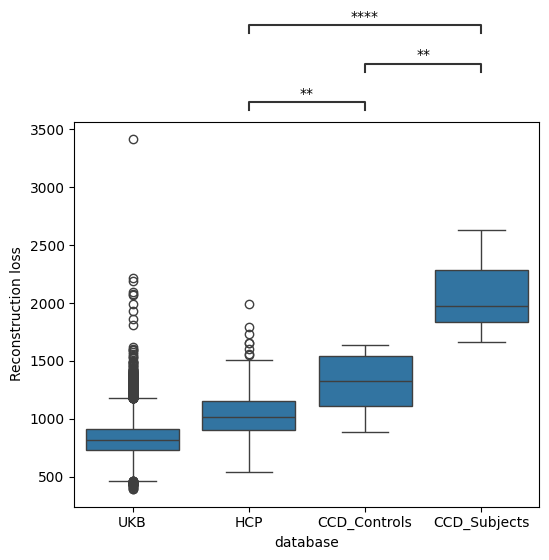

In [109]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()
